In [1]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [2]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    #setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #plot the decision surface
    x1_min, x1_max = X[:, 0].min()-1, X[:, 0].max()+1
    x2_min, x2_max = X[:, 1].min()-1, X[:, 1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    #plot all samples
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)
        
    #highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', s=55, label='test set')

In [2]:
#数据准备
#读取样本数据，并划分成训练集和测试集
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)
#对特征进行缩放，用于提高感知器性能
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

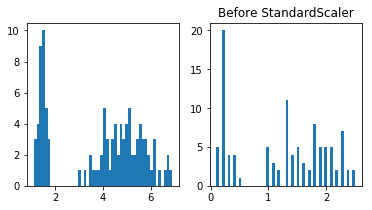

In [4]:
#对比进行特征缩放前和特征缩放后数据集的分布图
fig = plt.figure(figsize=(6,3))
ax3 = fig.add_subplot(121)
plt.hist(X_train[:,0], bins=50)
ax4 = fig.add_subplot(122)
plt.hist(X_train[:,1], bins=50)
plt.title(u'Before StandardScaler')
plt.show()

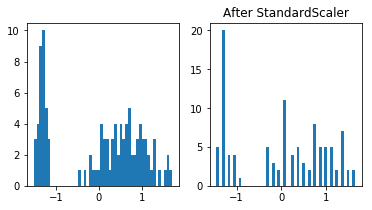

In [5]:
#缩放后的分布图
fig = plt.figure(figsize=(6,3))
ax1 = fig.add_subplot(121)
plt.hist(X_train_std[:,0], bins=50)
ax2 = fig.add_subplot(122)
plt.hist(X_train_std[:,1], bins=50)
plt.title(u'After StandardScaler')

## 感知器分类算法(OneVsRest)

In [6]:
#使用sklearn库创建感知器模型
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [7]:
#预测并输出误分类样本数
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 4


In [8]:
#输出模型的准确率
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.91


[0 1 2]


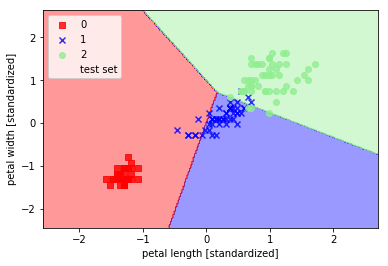

In [9]:
#画出模型的决策边界
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
print np.unique(y_test)
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

Misclassified samples: 18
Accuracy: 0.60
[0 1 2]


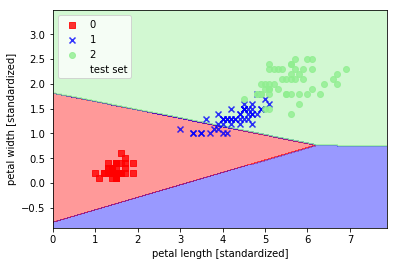

In [10]:
#对比特征缩放和未进行特征缩放模型的性能对比
#使用sklearn库创建感知器模型
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train, y_train)
#预测并输出误分类样本数
y_pred = ppn.predict(X_test)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
#输出模型的准确率
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
#画出模型的决策边界
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
print np.unique(y_test)
plot_decision_regions(X=X_combined, y=y_combined, classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

### 结论:没有进行特征缩放，模型的性能很差！！

## 逻辑斯谛回归

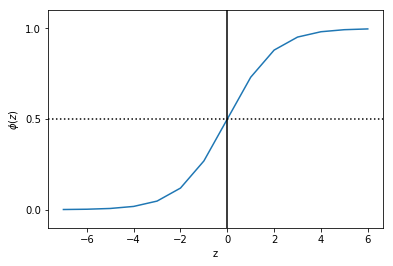

In [11]:
#画出logistic函数
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

z = np.arange(-7,7,1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.axhspan(0.0, 1.0, facecolor='1.0', alpha=1.0, ls='dotted')
plt.axhline(y=0.5, ls='dotted', color='k')
plt.yticks([0.0, 0.5, 1.0])
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.show()

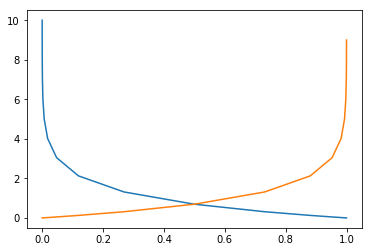

In [12]:
#画出逻辑斯谛函数的代价函数图
def costz_1(z):
    return - np.log(sigmoid(z))
def costz_0(z):
    return -np.log(1-sigmoid(z))
z = np.arange(-10,10,1)
plt.plot(sigmoid(z), costz_1(z))
plt.plot(sigmoid(z), costz_0(z))
plt.show()

In [13]:
#创建逻辑斯谛回归，并学习样本数据
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [14]:
#预测并输出误分类样本数
y_pred = lr.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 1


In [15]:
#输出模型的准确率
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.98


[0 1 2]


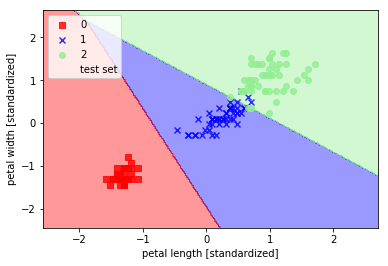

In [16]:
#画出模型的决策边界
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
print np.unique(y_test)
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

Misclassified samples: 1
Accuracy: 0.98
[0 1 2]


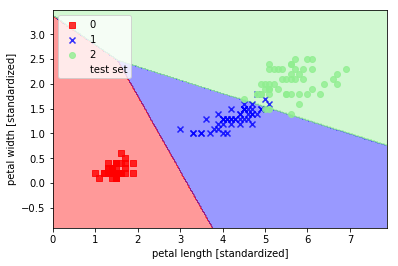

In [17]:
#对比特征缩放和无特征缩放对模型性能的影响
#创建逻辑斯谛回归，并学习样本数据
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train, y_train)
#预测并输出误分类样本数
y_pred = lr.predict(X_test)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
#输出模型的准确率
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
#画出模型的决策边界
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
print np.unique(y_test)
plot_decision_regions(X=X_combined, y=y_combined, classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

### 结论：没有进行特征缩放模型的性能不是太差！

## 支持向量机

In [18]:
#使用sklearn中的SVC模型进行学习
svm = SVC(kernel='linear',C=1.0,random_state=0)
svm.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [19]:
#预测并输出误分类样本数
y_pred = svm.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 1


In [20]:
#输出模型的准确率
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.98


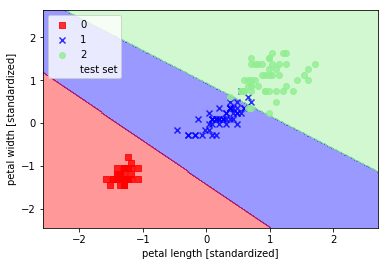

In [21]:
#画出决策边界
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

Misclassified samples: 1
Accuracy: 0.98


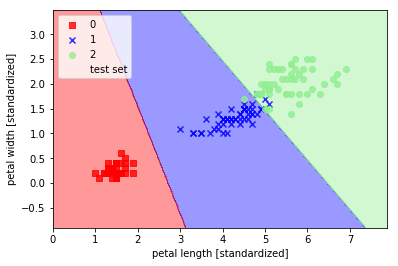

In [22]:
#对比进行特征缩放和未进行特征缩放对模型性能的影响
#使用sklearn中的SVC模型进行学习
svm = SVC(kernel='linear',C=1.0,random_state=0)
svm.fit(X_train, y_train)
#预测并输出误分类样本数
y_pred = svm.predict(X_test)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
#输出模型的准确率
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
#画出决策边界
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=svm, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

### 结论：可以看到特征缩放对模型的性能对性能的提高不是很明显

## 适用于大数据集的前面三种模型另外一种实现

In [23]:
#感知器
ppn = SGDClassifier(loss='perceptron')
#逻辑斯谛回归
lr = SGDClassifier(loss='log')
#支持向量机
svm = SGDClassifier(loss='hinge')

In [24]:
ppn.fit(X_train_std, y_train)
lr.fit(X_train_std, y_train)
svm.fit(X_train_std, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

In [25]:
#ppn的准确率
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 16
Accuracy: 0.64


In [26]:
#lr的准确率
y_pred = lr.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 3
Accuracy: 0.93


In [27]:
#svm的准确率
y_pred = svm.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 13
Accuracy: 0.71


## SVM核技巧

In [28]:
#使用rbf核(高斯核)改变一下SVM模型，提高性能
svm = SVC(kernel='rbf', random_state=0, gamma=0.2, C=10.0)
svm.fit(X_train_std, y_train)

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.2, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [29]:
y_pred = svm.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 1
Accuracy: 0.98


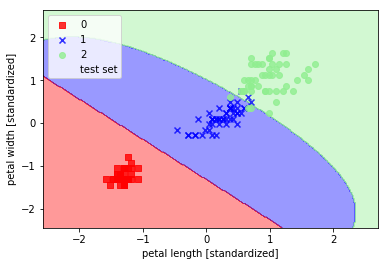

In [30]:
#画出决策边界
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

Misclassified samples: 1
Accuracy: 0.98


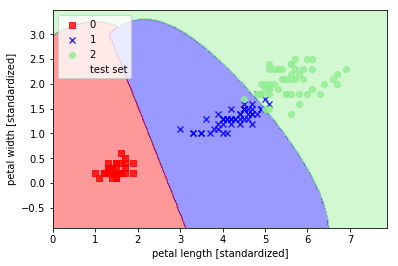

In [31]:
#对比特征缩放和非特征缩放对模型性能的影响
#使用rbf核(高斯核)改变一下SVM模型，提高性能
svm = SVC(kernel='rbf', random_state=0, gamma=0.2, C=10.0)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
#画出决策边界
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=svm, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

### 结论：特征缩放对模型性能影响不大

## 决策树

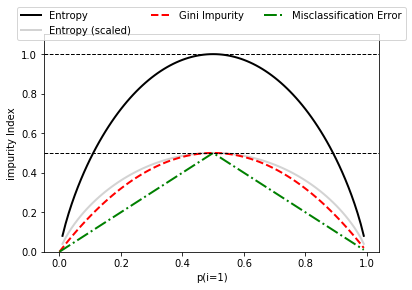

In [32]:
#最大化信息增益——获取尽可能准确的结果
#熵和误分类率对基尼系数的影响
def gini(p):
    return (p)*(1-(p)) + (1-p)*(1-(1-p))

def entropy(p):
    return -p*np.log2(p) - (1-p)*np.log2((1-p))

def error(p):
    return 1-np.max([p,1-p])

#生成不同的二分类概率样本集
x = np.arange(0.0, 1.0, 0.01)
#熵
ent = [entropy(p) if p != 0 else None for p in x]
#scale entropy
sc_ent = [e*0.5 if e else None for e in ent]
#误分类率
err = [error(i) for i in x]

#画图
fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err],['Entropy', 'Entropy (scaled)', 'Gini Impurity', 'Misclassification Error'], ['-','-','--','-.'],['black','lightgray','red','green']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0,1.1])
plt.xlabel('p(i=1)')
plt.ylabel('impurity Index')
plt.show()

In [6]:
#使用sklearn来构建决策树模型
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(X_train_std, y_train)

<type 'builtin_function_or_method'>
int64
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [34]:
y_pred = tree.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 1
Accuracy: 0.98


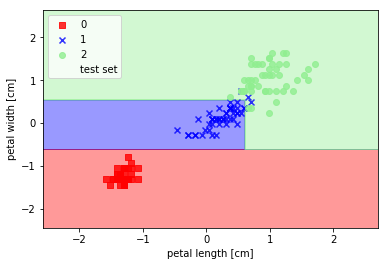

In [35]:
#画出决策边界
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined_std, y_combined, classifier=tree, test_idx=range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

In [36]:
#输出文本格式的决策树过程图
export_graphviz(tree, out_file='data/tree.dot', feature_names=['petal length','petal width'])

Misclassified samples: 1
Accuracy: 0.98


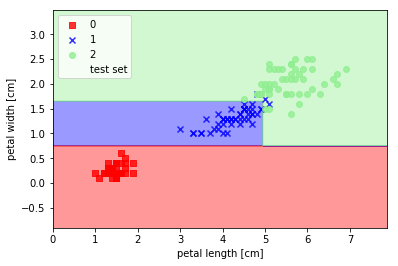

In [37]:
#对比特征缩放和非特征缩放对模型的性能的影响
#使用sklearn来构建决策树模型
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
#画出决策边界
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=tree, test_idx=range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

### 结论：特征缩放对决策树的性能影响不大

## 随机森林

In [38]:
#使用随机森林进行学习，10颗决策树，n_jobs表示使用处理器内核的数量
forest = RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1, n_jobs=2)
forest.fit(X_train_std, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=2, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

In [39]:
y_pred = forest.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 2
Accuracy: 0.96


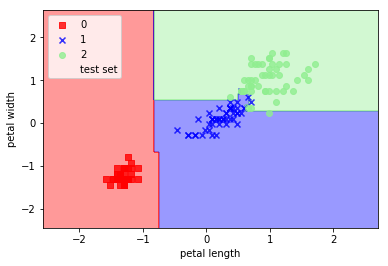

In [40]:
#画出决策边界
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined_std, y_combined, classifier=forest, test_idx=range(105, 150))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

Misclassified samples: 2
Accuracy: 0.96


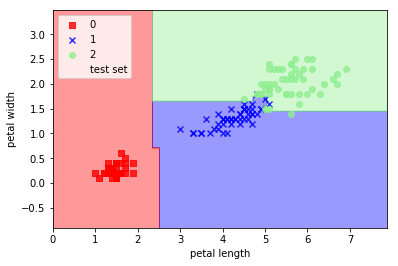

In [41]:
#对比特征缩放和非特征缩放对模型的性能的影响
#使用随机森林进行学习，10颗决策树，n_jobs表示使用处理器内核的数量
forest = RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1, n_jobs=2)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
#画出决策边界
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=forest, test_idx=range(105, 150))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

### 结论:特征缩放对随机森林模型的性能影响不大

## k近邻算法

In [42]:
#使用sklearn进行k近邻算法建模
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [43]:
y_pred = knn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 0
Accuracy: 1.00


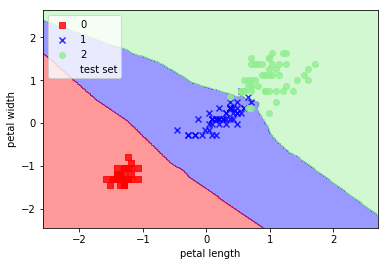

In [44]:
#画出决策边界
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined_std, y_combined, classifier=knn, test_idx=range(105, 150))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

Misclassified samples: 1
Accuracy: 0.98


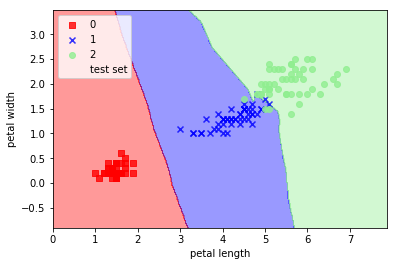

In [45]:
#对比特征缩放与否对模型性能的影响
#使用sklearn进行k近邻算法建模
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
#画出决策边界
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=knn, test_idx=range(105, 150))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

### 结论：特征缩放对k近邻算法没有明显的影响